In [32]:
from sympy import *
from sympy.vector import Vector
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

n, m, d, k, l, a, b = symbols( 'n m d k l a b', integer=True, positive=True, finite=True)
x, y = symbols('x y', positive=True, real=True)
t = symbols('t', positive=True, real=True)
init_printing(use_unicode=True)

# Basis vectors for convenience:

v1 = N.i
v2 = N.j

# "Generic" choice of vector in the (dual of the) Lie algebra:

Phi = t*(v1 + 2*v2)

Polyptych for $T^{*}\left(\mathbb{CP}^{1} \times \mathbb{CP}^{1}\right)$, cut at the level $d \in \mathbb{Z}_{\geq 0}$. The points are at:

$$ P_{12} = (0,0), \quad P_{23} = (n,0), \quad P_{34} = (n,m), \quad P_{14} = (0,m), $$

and

$$ Q_{12}^{(1)} = (0,-d), \quad Q_{12}^{(2)} = (-d,0), \quad Q_{23}^{(2)} = (n+d,0), \quad Q_{23}^{(3)} = (n,-d), $$

$$ Q_{34}^{(3)} = (n,m + d), \quad Q_{34}^{(4)} = (n + d, m), \quad Q_{14}^{(1)} = (0,m+d), \quad Q_{14}^{(4)} = (-d,m). $$



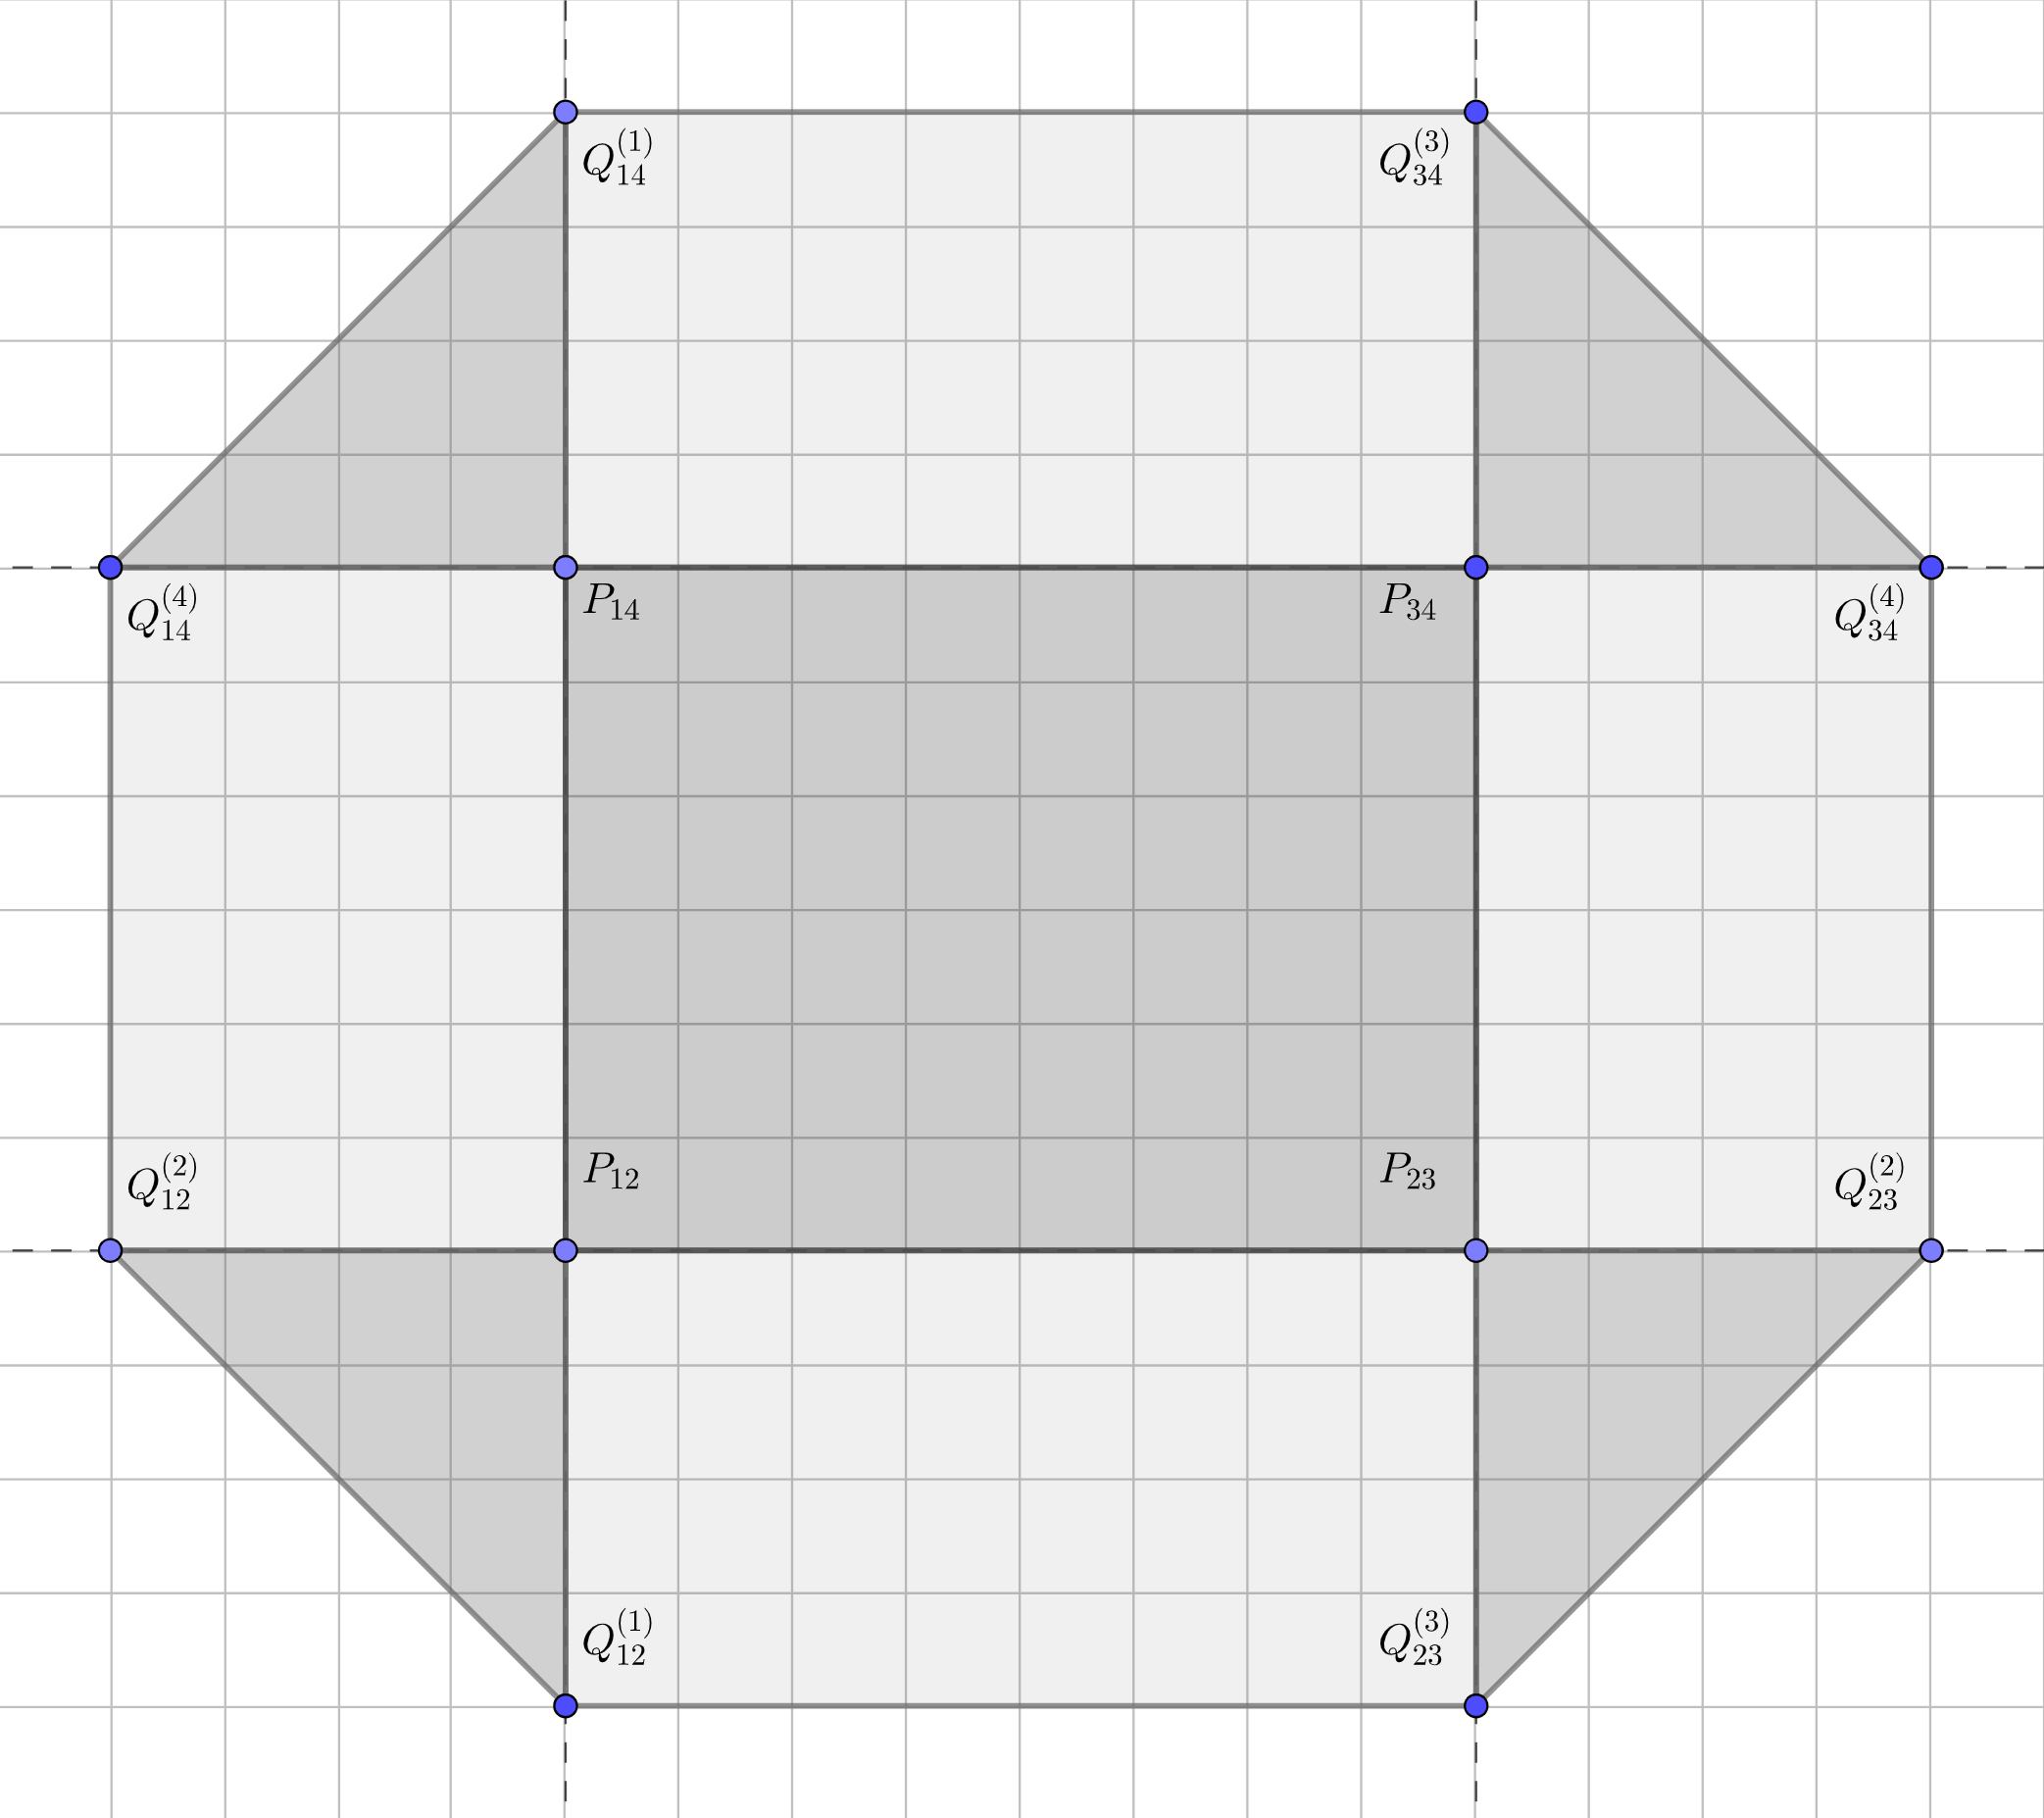

In [2]:
# Define the interior vertices:

def P12(n,m,d):
    return Vector.zero

def P23(n,m,d):
    return n*v1

def P14(n,m,d):
    return m*v2

def P34(n,m,d):
    return n*v1 + m*v2

# Exterior points coming from the cut:

def Q12_1(n,m,d):
    return -d*v2

def Q12_2(n,m,d):
    return -d*v1

def Q23_2(n,m,d):
    return (n+d)*v1

def Q23_3(n,m,d):
    return n*v1 - d*v2

def Q34_3(n,m,d):
    return n*v1 + (m+d)*v2

def Q34_4(n,m,d):
    return (n+d)*v1 + m*v2

def Q14_1(n,m,d):
    return (m+d)*N.j

def Q14_4(n,m,d):
    return -d*N.i + m*N.j

# Define the term which is summed over each fixed point,
# representing the character for the representation

def f(P, edge1, edge2):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) )

def g(P, edge1, edge2, edge3, edge4):
    return exp( Phi.dot(P) ) / ( (1 - exp( Phi.dot(edge1) ) ) * ( 1 - exp( Phi.dot(edge2) ) ) * ( 1 - exp( Phi.dot(edge3) ) ) * ( 1 - exp( Phi.dot(edge4) ) ) )

# For each of the right-angled triangles:
# Delta12 is the bottom-left simplex:

def Delta12(n,m,d):
    return f( P12(n,m,d), v1, v2 ) * ( f( Vector.zero, -v1, -v2 ) + f( -d*v1, v1, v1 - v2 ) + f( -d*v2, v2, -v1 + v2 ) )

# Delta23 is the bottom-right simplex:

def Delta23(n,m,d):
    return f( P23(n,m,d), -v1, v2 ) * ( f( Vector.zero, v1, -v2 ) + f( d*v1, -v1, -v1 - v2 ) + f( -d*v2, v1 + v2, v2 ) )

# Delta34 is the top-right simplex:

def Delta34(n,m,d):
    return f( P34(n,m,d), -v1 , -v2 ) * ( f( Vector.zero, v1, v2 ) + f( d*v1, -v1 + v2, -v1 ) + f( d*v2, v1 - v2, -v2 ) )

# Delta14 is the top-left simplex:

def Delta14(n,m,d):
    return f( P14(n,m,d), v1 , -v2 ) * ( f( Vector.zero, v2, -v1 ) + f( -d*v1, v1, v1 + v2 ) + f( d*v2, -v1 - v2, -v2 ) )

# And their sum:

def PolyptychSum(n,m,d):
    return Delta12(n,m,d) + Delta23(n,m,d) + Delta34(n,m,d) + Delta14(n,m,d)

# Take the limit as t -> 0 to get the Euler characteristic:

def SumLimit(n,m,d):
    return limit(PolyptychSum(n,m,d),t,0)


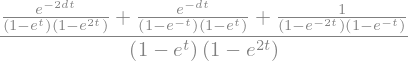

In [3]:
Delta12(n,m,d) # The bottom-left simplex

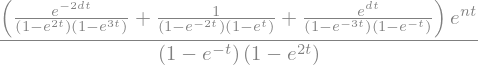

In [4]:
Delta23(n,m,d) # The bottom-right simplex

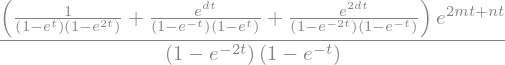

In [5]:
Delta34(n,m,d) # The top-right simplex

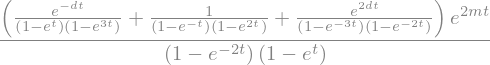

In [6]:
Delta14(n,m,d) # The top-left simplex

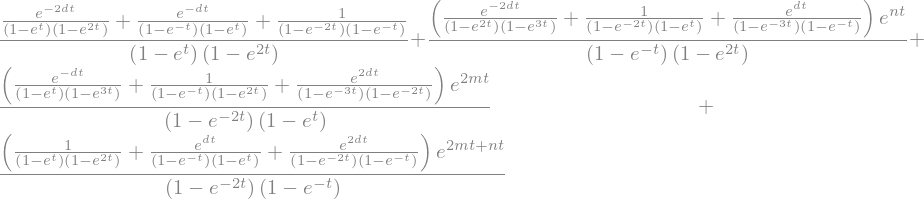

In [7]:
PolyptychSum(n,m,d) # Take their sum

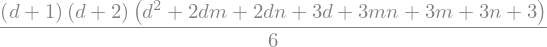

In [8]:
factor(SumLimit(n,m,d)) # And let ϕ tend to zero, so that
                        # χ(1,1) = dimension of space of holomorphic sections on T*(CP1 x CP1)

In [9]:
# Define result as a function for computational efficiency:

def Euler(n,m,d):    
    return factor( ( Rational(1, 6) * (d + 1) * (d + 2) * (d**2 + 2*d*n + 2*d*m + 3*d + 3*n*m + 3*m + 3*n + 3) ) )

# Its output is equal to the calculated integer:

factor(SumLimit(n,m,d)) == Euler(n,m,d)

True

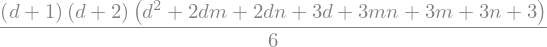

In [10]:
# Print the output for peace of mind:

Euler(n,m,d)

# Example calculation for (n,m,d) = (4,2,1):

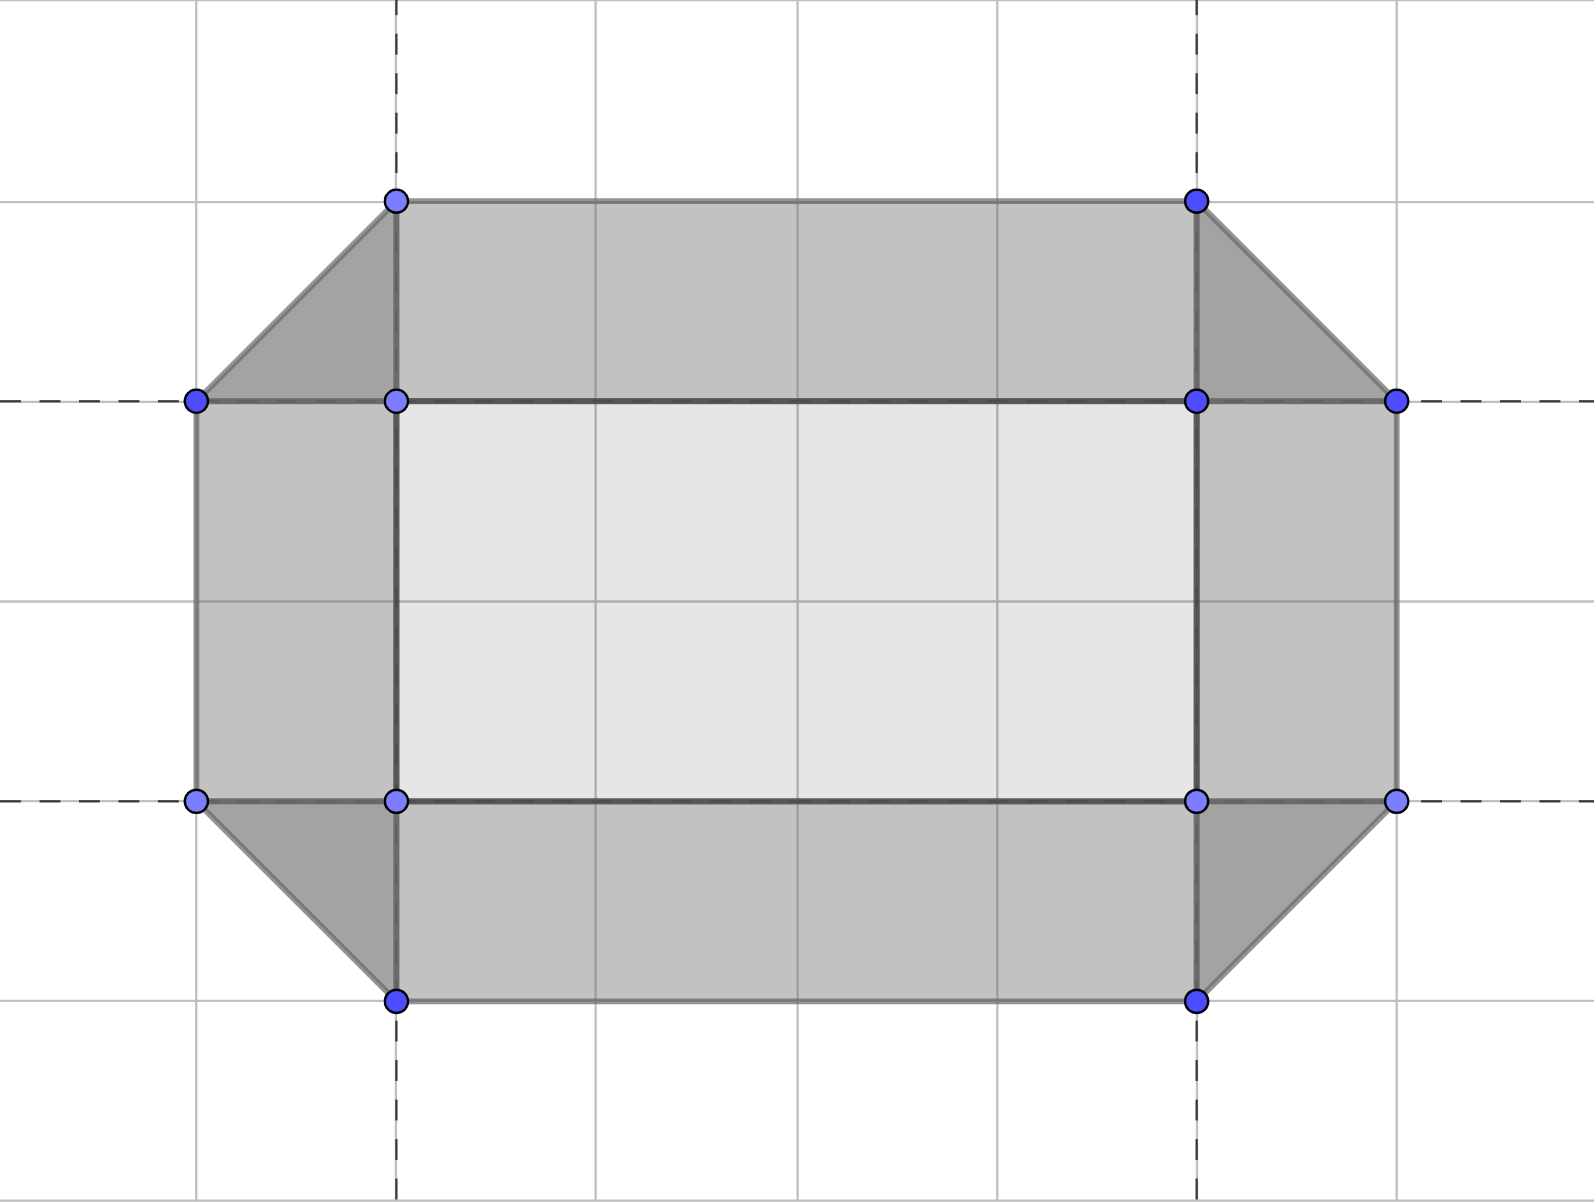

# Case for d = 1:

## Bottom half of polyptych:

$$ ( x^{0}y^{0} + x^{-1}y^{0} + x^{0}y^{-1} ) \cdot \frac{1}{(1-x)(1-y)} - x^{5}( x^{0}y^{0} + x^{1}y^{0} + x^{0}y^{-1} ) \cdot \frac{1}{(1-x)(1-y)} $$

$$ = \frac{1}{(1-y)} \cdot \left(\sum_{k=0}^{\infty} x^{k}\right) \cdot \left( \left[ x^{0}y^{0} + x^{-1}y^{0} + x^{0}y^{-1} \right] - \left[ x^{5}y^{0} + x^{6}y^{0} + x^{5}y^{-1} \right] \right) $$

$$ = \frac{1}{(1-y)} \cdot \left(\sum_{k=0}^{\infty} x^{k}\right) \cdot \left( y^{0} \left[ x^{0} + x^{-1} - x^{5} - x^{6})  \right] + y^{-1} \left[ x^{0} - x^{5} \right] \right) $$

$$ = \frac{1}{(1-y)} \cdot \left(\sum_{k=0}^{\infty} x^{k}\right) \cdot \left( y^{0} \left[ (x^{0} - x^{5}) + x^{-1}(x^{0} - x^{7})  \right] + y^{-1} \left[ x^{0} - x^{5} \right] \right) $$

$$ = \frac{1}{(1-y)} \cdot \left(\sum_{k=0}^{\infty} x^{k}\right) \cdot \left( \left[y^{0} + y^{-1} \right](x^{0} - x^{5}) + x^{-1} \left[ x^{0} - x^{7} \right] \right) $$

$$ = \frac{1}{(1-y)} \cdot \left[ \left(y^{0} + y^{-1} \right)S_{4}(x) + x^{-1} S_{6}(x) \right] $$

(where I have set $S_{k}(x) := \sum_{i = 0}^{k}x^{i}$ for clarity).

## Top half of polyptych:

$$ y^{2}\left[( x^{0}y^{0} + x^{-1}y^{0} + x^{0}y^{1} ) \cdot \frac{1}{(1-x)(1-y^{-1})} \right] - x^{5}y^{2} \left[ ( x^{0}y^{0} + x^{1}y^{0} + x^{0}y^{-1} ) \cdot \frac{1}{(1-x)(1-y^{-1})} \right] $$

$$ = \frac{y^{2}}{(1-y^{-1})} \cdot \left(\sum_{k=0}^{\infty} x^{k}\right) \cdot \left( \left[ x^{0}y^{0} + x^{-1}y^{0} + x^{0}y^{1} \right] - \left[ x^{5}y^{0} + x^{6}y^{0} + x^{5}y^{1} \right] \right) $$

$$ = \frac{y^{2}}{(1-y^{-1})} \cdot \left(\sum_{k=0}^{\infty} x^{k}\right) \cdot \left( y^{0} \left[ x^{0} + x^{-1} - x^{5} - x^{6})  \right] + y^{1} \left[ x^{0} - x^{5} \right] \right) $$

$$ = \frac{y^{2}}{(1-y^{-1})} \cdot \left(\sum_{k=0}^{\infty} x^{k}\right) \cdot \left( y^{0} \left[ (x^{0} - x^{5}) + x^{-1}(x^{0} - x^{7})  \right] + y^{1} \left[ x^{0} - x^{5} \right] \right) $$

$$ = \frac{y^{2}}{(1-y^{-1})} \cdot \left(\sum_{k=0}^{\infty} x^{k}\right) \cdot \left( \left[y^{0} + y^{1} \right](x^{0} - x^{5}) + x^{-1} \left[ x^{0} - x^{7} \right] \right) $$

$$ = \frac{y^{2}}{(1-y^{-1})} \cdot \left[ \left(y^{0} + y^{1} \right)S_{4}(x) + x^{-1} S_{6}(x) \right] $$

$$ = -\frac{y^{3}}{(1-y)} \cdot \left[ \left(y^{0} + y^{1} \right)S_{4}(x) + x^{-1} S_{6}(x) \right] $$

## And then their sum:

$$ \frac{1}{(1-y)} \cdot \left[ \left(y^{0} + y^{-1} \right)S_{4}(x) + x^{-1} S_{6}(x) \right] -\frac{y^{3}}{(1-y)} \cdot \left[ \left(y^{0} + y^{1} \right)S_{4}(x) + x^{-1} S_{6}(x) \right] $$

$$ = \frac{1}{(1-y)} \left[ S_{4}(x)\left( (y^{0} + y^{-1}) - y^{3}(y^{0} + y^{1}) \right) + x^{-1}S_{6}(x)(y^{0} - y^{3}) \right] $$

$$ = \frac{1}{(1-y)} \left[ S_{4}(x)\left(y^{0} - y^{3}\right) + y^{-1}S_{4}(x)\left(y^{0} + y^{5} \right) + x^{-1}S_{6}(x) \left( y^{0} - y^{3} \right) \right] $$

$$ = S_{4}(x)S_{2}(y) + y^{-1}S_{4}(x)S_{4}(y) + x^{-1}S_{6}(x)S_{2}(y) $$

$$ = \left( \sum\limits_{\substack{0 \leq a \leq 4 \\ 0 \leq b \leq 2}} x^{a}y^{b} \right) + x^{-1}\left(\sum\limits_{\substack{0 \leq a \leq 6 \\ 0 \leq b \leq 2}} x^{a}y^{b} \right) + y^{-1}\left(\sum\limits_{\substack{0 \leq a \leq 4 \\ 0 \leq b \leq 4}} x^{a}y^{b} \right) $$

# Ansatz(?):

$$ \chi_{n,m,d}(x,y) = \left( \sum\limits_{\substack{0 \leq a \leq n \\ 0 \leq b \leq m}} x^{a}y^{b} \right) + x^{-1}\left(\sum\limits_{\substack{0 \leq a \leq n + 2 \\ 0 \leq b \leq m}} x^{a}y^{b} \right) + y^{-1}\left(\sum\limits_{\substack{0 \leq a \leq n \\ 0 \leq b \leq m + 2}} x^{a}y^{b} \right) + y^{-2}\left(\sum\limits_{\substack{0 \leq a \leq n \\ 0 \leq b \leq m + 4}} x^{a}y^{b} \right) + x^{-1}y^{-1}\left(\sum\limits_{\substack{0 \leq a \leq n + 2 \\ 0 \leq b \leq m + 2}} x^{a}y^{b} \right)  $$

$$ + x^{-2}\left(\sum\limits_{\substack{0 \leq a \leq n + 4 \\ 0 \leq b \leq m}} x^{a}y^{b} \right) + \ldots + x^{-k}y^{-l}\left(\sum\limits_{\substack{0 \leq a \leq n + 2k \\ 0 \leq b \leq m + 2l}} x^{a}y^{b} \right) + \ldots $$

$$ + x^{-d+1}y^{-1}\left(\sum\limits_{\substack{0 \leq a \leq n + 2(d-1) \\ 0 \leq b \leq m + 2}} x^{a}y^{b} \right) + x^{-d+2}y^{-2}\left(\sum\limits_{\substack{0 \leq a \leq n + 2(d-2) \\ 0 \leq b \leq m + 4}} x^{a}y^{b} \right) + \ldots $$

$$ + x^{-2}y^{-d+2}\left(\sum\limits_{\substack{0 \leq a \leq n + 4 \\ 0 \leq b \leq m + 2(d-2)}} x^{a}y^{b} \right) + x^{-1}y^{-d+1}\left(\sum\limits_{\substack{0 \leq a \leq n + 2 \\ 0 \leq b \leq m + 2(d-1)}} x^{a}y^{b} \right) + y^{-d}\left(\sum\limits_{\substack{0 \leq a \leq n \\ 0 \leq b \leq m + 2d}} x^{a}y^{b} \right) $$

$$ = \sum\limits_{\substack{0 \leq k \leq d}} \left[ \sum\limits_{\substack{0 \leq l \leq d - k}} x^{-k}y^{-l} \left( \sum\limits_{\substack{0 \leq a \leq n + 2k \\ 0 \leq b \leq m + 2l}} x^{a}y^{b} \right) \right]. $$

Letting $ (x,y) \rightarrow (1,1) $, we should get:

$$ \chi_{n,m,d}(1,1) = \sum\limits_{\substack{0 \leq k \leq d}} \left[ \sum\limits_{\substack{0 \leq l \leq d - k}} 1 \left( \sum\limits_{\substack{0 \leq a \leq n + 2k \\ 0 \leq b \leq m + 2l}} 1 \right) \right] = \frac{(d+1)(d+2)(d^{2} + 2dm + 2dn + 3d + 3mn + 3m + 3n + 3)}{6}.$$

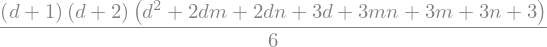

In [11]:
# Now we can prove (or disprove) this result using Sympy:

# The inner-most summation:

display( Sum( Sum(1, (a, 0, n + 2*k)).doit(), (b,0,m + 2*l) ).doit() )

# The middle summation:

display( factor( Sum( (n + 2*k + 1)*(m + 2*l + 1), (l,0,d-k) ).doit() ) )

# The outer-most summation:

display( factor( Sum( (d - k + 1) * ( 2*k + n + 1 ) * ( d - k + m + 1 ), (k, 0, d) ).doit() ) )

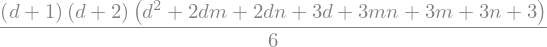

In [12]:
# Define the nested summation as a single function:

def CharacterIdentity(n,m,d):
    return factor( Sum( Sum( Sum( Sum(1, (a, 0, n + 2*k)).doit(), (b,0,m + 2*l) ).doit(), (l,0,d-k)).doit(), (k, 0, d) ).doit() )

CharacterIdentity(n,m,d)

In [13]:
# Verify that the formulae are logically equivalent:

CharacterIdentity(n,m,d) == factor(SumLimit(n,m,d))

True

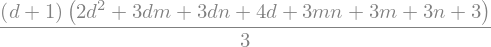

In [14]:
# The difference between d and d-1 levels:

def Diff(n,m,d):
    return factor(Euler(n,m,d) - Euler(n,m,d-1))

Diff(n,m,d)

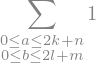

In [19]:
def CoreSum(n, m, k, l):
    return Sum( Sum( 1, (a, 0, n + 2*k) ), (b,0,m + 2*l) )

def DoItCoreSum(n,m,k,l):
    return Sum( Sum( 1, (a, 0, n + 2*k) ).doit(), (b,0,m + 2*l) ).doit()

display( CoreSum(n, m, k, l) )

display( DoItCoreSum(n, m, k, l) )

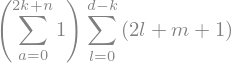

In [28]:
def MiddleSum(m,n,k,l,d):
    return factor( Sum( Sum( Sum( 1, (a, 0, n + 2*k) ), (b,0,m + 2*l) ), (l,0,d-k) ) )

def DoItMiddleSum(m,n,k,l,d):
    return factor( Sum( (n + 2*k + 1)*(m + 2*l + 1), (l,0,d-k) ).doit() )

display( MiddleSum(m,n,k,l,d) )

display( DoItMiddleSum(m,n,k,l,d) )

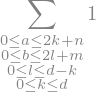

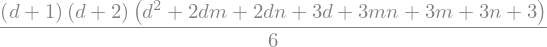

In [31]:
def OuterSum(m,n,k,l,d):
    return Sum( Sum( Sum( Sum( 1, (a, 0, n + 2*k) ), (b,0,m + 2*l) ), (l,0,d-k) ), (k, 0, d) )

def DoItOuterSum(m,n,k,l,d):
    return factor( Sum( (d - k + 1)*(2*k + n + 1)*(d - k + m + 1), (k,0,d) ).doit() )

display( OuterSum(m,n,k,l,d) )

display( DoItOuterSum(m,n,k,l,d) )

In [36]:
def CoreCharacter(n, m, k, l, x, y):
    return Sum( Sum( (x**a)*(y**b), (a, 0, n + 2*k) ), (b,0,m + 2*l) )

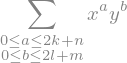

In [37]:
CoreCharacter(n,m,k,l,x,y)

In [55]:
def MiddleCharacter(m,n,k,l,d,x,y):
    return factor( Sum( Sum( Sum( (x**a)*(y**b), (a, 0, n + 2*k) ), (b, 0, m + 2*l) ), (l, 0, d-k) ) )

def Character(m,n,d,x,y):
    return Sum( Sum( Sum( Sum( (x**a)*(y**b), (a, 0, n + 2*k) ), (b,0,m + 2*l) ), (l,0,d-k) ), (k, 0, d) )

def DoItCharacter(m,n,d,x,y):
    return factor( Sum( Sum( Sum( Sum( (x**a)*(y**b), (a, 0, n + 2*k) ).doit(), (b,0,m + 2*l) ).doit(), (l,0,d-k) ).doit(), (k, 0, d) ).doit() )

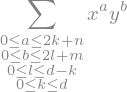

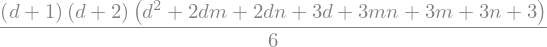

In [57]:
display( Character(m,n,d,x,y) )

DoItCharacter(m,n,d,1,1)

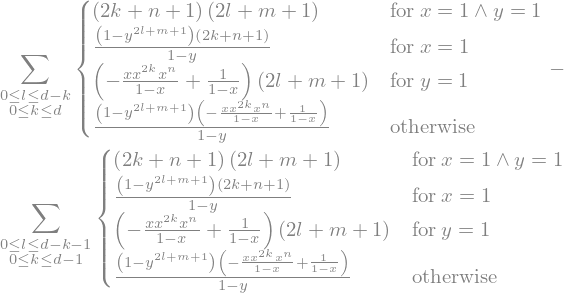

In [60]:
simplify( Character(m,n,d,x,y) - Character(m,n,d-1,x,y) )

In [70]:
series( series( Character(4,2,2,x,y), x, 1, dir='+').removeO(), y, 1, dir='+').removeO()

NotImplementedError: 
The _eval_nseries method should be added to <class
'sympy.concrete.summations.Sum'> to give terms up to O(x**n) at x=0
from the positive direction so it is available when nseries calls it.